From the traffic accidents data classify if a road is safe or dangerous 

In [25]:
#import dependencies
import pandas as pd
import numpy as np

In [26]:
#load the data
traffic_df = pd.read_excel('data\TRAFFIC ACCIDENTS DATA.xlsx')
traffic_df.head(10)

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,Passengers,5,NaN,NaN
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,Passengers,6,NaN,NaN
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,Passengers,7,NaN,NaN
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,Passengers,4,NaN,NaN
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,Passengers,5,NaN,NaN


In [27]:
# print(traffic_df["Brief Accident Details/Cause"].unique())
print(traffic_df["Total people confirmed dead"].value_counts())

# print(traffic_df["Road/ Highway"].value_counts())

Total people confirmed dead
1     11
0     11
3      9
4      8
2      7
5      6
7      6
6      3
18     2
14     2
-      1
8      1
52     1
10     1
20     1
12     1
11     1
Name: count, dtype: int64


## Data Preprocessing


In [28]:
traffic_df.info()
#check for null values.
traffic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          80 non-null     datetime64[ns]
 1   Accident Spot                 81 non-null     object        
 2   Area                          81 non-null     object        
 3   County                        81 non-null     object        
 4   Road/ Highway                 80 non-null     object        
 5   Brief Accident Details/Cause  79 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   72 non-null     object        
 8   Time of the Accidents         25 non-null     object        
 9   Weather conditions            1 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 6.5+ KB


Date                             1
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    1
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
Weather conditions              80
dtype: int64

In [29]:
# drop columns
traffic_df2 = traffic_df.copy()
columns_to_drop = ["Date","Area","County","Accident Spot","Brief Accident Details/Cause","Weather conditions"]
traffic_df2.drop(columns = columns_to_drop, axis=1, inplace= True)
traffic_df2

,Road/ Highway,Victims,Total people confirmed dead,Time of the Accidents
0,Nakuru-Eldoret Highway,Passengers,4,4.30 pm
1,Maai-Mahiu Naivasha Highway,Passengers,1,5.50 pm
2,Narok Mai Mahiu road,Drivers/Occupants,4,NaN
3,Narok Mai Mahiu road,Driver and passengers,3,6.00 pm
4,Kerugoya-Karatina Road,Pedestrian,1,NaN
...,...,...,...,...
76,Nairobi Kakamega road,Passengers,1,NaN
77,Namanga Road,Passengers,1,11.00 pm
78,Naivasha Nairobi Highway,Passengers,1,NaN
79,Nakuru - Nairobi highway,Passengers,4,NaN


In [30]:
traffic_df2["Total people confirmed dead"].value_counts()

Total people confirmed dead
1     11
0     11
3      9
4      8
2      7
5      6
7      6
6      3
18     2
14     2
-      1
8      1
52     1
10     1
20     1
12     1
11     1
Name: count, dtype: int64

In [31]:
traffic_df2["Total people confirmed dead"] = traffic_df2["Total people confirmed dead"].fillna(0)
traffic_df2.isna().sum()


Road/ Highway                   1
Victims                        18
Total people confirmed dead     0
Time of the Accidents          56
dtype: int64

In [32]:
# victims_map = {
#     "Passengers and driver": "Driver and passengers",
#     "Pedestrian": "Pedestrians",
#     "Passengers and drivers": "Driver and passengers",
#     "Passenger": "Passengers",
#     "passengers":"Passengers",
#     "Passangers and driver": "Driver and passengers",
#     "Drivers/Occupants": "Occupants of the small vehicle",
#     "passenger":"Passengers"
# }

# traffic_df2["Victims"] = traffic_df2["Victims"].str.strip().replace(victims_map)
# traffic_df2["Victims"].value_counts()

In [33]:
traffic_df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,Passengers,1,NaN,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,Passengers,1,11.00 pm,NaN
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,Passengers,1,NaN,NaN
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,Passengers,4,NaN,NaN


In [34]:
traffic_df2["Victims"] = traffic_df2["Victims"]

In [35]:
#convert the column to numeric
traffic_df2["Total people confirmed dead"] = pd.to_numeric(traffic_df2["Total people confirmed dead"], errors="coerce")
traffic_df2["Total people confirmed dead"] = traffic_df2["Total people confirmed dead"].fillna(0)
traffic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Road/ Highway                80 non-null     object 
 1   Victims                      63 non-null     object 
 2   Total people confirmed dead  81 non-null     float64
 3   Time of the Accidents        25 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.7+ KB


In [36]:
traffic_df2["Time of the Accidents"] = traffic_df2["Time of the Accidents"].ffill()
from datetime import datetime

# Function to convert 12-hour time to 24-hour format and extract the hour
def convert_to_24_hour_and_extract_hour(time_str):
    try:
        # Parse time in 12-hour format with AM/PM
        time_obj = datetime.strptime(time_str.strip(), '%I.%M %p')
        # Convert to 24-hour format and extract the hour
        return time_obj.hour
    except ValueError:
        return None

# Apply the function to the "Time of the Accidents" column
traffic_df2["Hour"] = traffic_df2["Time of the Accidents"].apply(convert_to_24_hour_and_extract_hour)

# View the updated DataFrame
traffic_df2[["Time of the Accidents", "Hour"]]


,Time of the Accidents,Hour
0,4.30 pm,16
1,5.50 pm,17
2,5.50 pm,17
3,6.00 pm,18
4,6.00 pm,18
...,...,...
76,2.00 pm,14
77,11.00 pm,23
78,11.00 pm,23
79,11.00 pm,23


In [37]:
#convert the Road/Highway column to numeric
traffic_df2.dropna(axis = 0, inplace=True) # axis = 0 to drop rows with missing values
traffic_df2["Road/ Highway"] = traffic_df2["Road/ Highway"].str.strip().str.replace("-", " ") # Remove leading and trailing whitespaces and replace hyphens with spaces
traffic_df2["Road/ Highway"].unique()

array(['Nakuru Eldoret Highway', 'Maai Mahiu Naivasha Highway',
       'Narok Mai Mahiu road', 'Kerugoya Karatina Road',
       'Kenol Sagana Road', 'Meru Embu Road', 'Thika Road',
       'Nairobi   Nakuru highway', 'Mombasa   Nairobi highway',
       'Nakuru Kericho Highway', 'Bomet   Sotik highway',
       'Kisumu Highway', 'Kisumu   Busia Road',
       'Nakuru   Nairobi highway', 'Narok road', 'Nairobi Express way',
       'Homabay  Kendubay Road', 'Eldoret Webuye Highway',
       'Migori Kisii Isebania Highway', 'Sagana Kenol Road',
       'Kilifi Malindi Road', 'Nakuru Eldoret highway',
       'Kisii Keroka Road', 'Naromoru Nanyuki Road', 'Kenol Muranga road',
       'Migori Isibania Road', 'Lodwar Kakuma Road',
       'Kakamega Kisumu Road', 'Namanga Road', 'Kisumu Kakamega road',
       'Thika Kitui Highway', 'Nairobi Kakamega road',
       'Naivasha Nairobi Highway'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#apply the label encoder to the roads column
traffic_df2["Road/Highway Encoded"] = label_encoder.fit_transform(traffic_df2["Road/ Highway"])

# Check the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Bomet   Sotik highway': 0, 'Eldoret Webuye Highway': 1, 'Homabay  Kendubay Road': 2, 'Kakamega Kisumu Road': 3, 'Kenol Muranga road': 4, 'Kenol Sagana Road': 5, 'Kerugoya Karatina Road': 6, 'Kilifi Malindi Road': 7, 'Kisii Keroka Road': 8, 'Kisumu   Busia Road': 9, 'Kisumu Highway': 10, 'Kisumu Kakamega road': 11, 'Lodwar Kakuma Road': 12, 'Maai Mahiu Naivasha Highway': 13, 'Meru Embu Road': 14, 'Migori Isibania Road': 15, 'Migori Kisii Isebania Highway': 16, 'Mombasa   Nairobi highway': 17, 'Nairobi   Nakuru highway': 18, 'Nairobi Express way': 19, 'Nairobi Kakamega road': 20, 'Naivasha Nairobi Highway': 21, 'Nakuru   Nairobi highway': 22, 'Nakuru Eldoret Highway': 23, 'Nakuru Eldoret highway': 24, 'Nakuru Kericho Highway': 25, 'Namanga Road': 26, 'Narok Mai Mahiu road': 27, 'Narok road': 28, 'Naromoru Nanyuki Road': 29, 'Sagana Kenol Road': 30, 'Thika Kitui Highway': 31, 'Thika Road': 32}


In [39]:
# add a column to serve as the target variable
traffic_df2["is_road_safe"] = traffic_df2.apply(lambda row: 1 if (row["Total people confirmed dead"] <= 2 ) else 0, axis =1)#1 road is safe 0 unsafe
traffic_df2["is_road_safe"].value_counts()
traffic_df2

,Road/ Highway,Victims,Total people confirmed dead,Time of the Accidents,Hour,Road/Highway Encoded,is_road_safe
0,Nakuru Eldoret Highway,Passengers,4.0,4.30 pm,16,23,0
1,Maai Mahiu Naivasha Highway,Passengers,1.0,5.50 pm,17,13,1
2,Narok Mai Mahiu road,Drivers/Occupants,4.0,5.50 pm,17,27,0
3,Narok Mai Mahiu road,Driver and passengers,3.0,6.00 pm,18,27,0
4,Kerugoya Karatina Road,Pedestrian,1.0,6.00 pm,18,6,1
...,...,...,...,...,...,...,...
76,Nairobi Kakamega road,Passengers,1.0,2.00 pm,14,20,1
77,Namanga Road,Passengers,1.0,11.00 pm,23,26,1
78,Naivasha Nairobi Highway,Passengers,1.0,11.00 pm,23,21,1
79,Nakuru Nairobi highway,Passengers,4.0,11.00 pm,23,22,0


In [40]:
traffic_df2["is_road_safe"].value_counts()

is_road_safe
0    38
1    24
Name: count, dtype: int64

## Model Training

In [41]:
#split the data into training and test sets
X = traffic_df2[["Total people confirmed dead", "Hour", "Road/Highway Encoded"]].values
y = traffic_df2["is_road_safe"].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, shuffle=True, random_state=1)

In [43]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape


((46, 3), (16, 3))

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


models = {"RandomForest": RandomForestClassifier(), # random forest classifier model 
          "SVC":SVC(), # support vector classifier model
          "Logistic Regression":LogisticRegression(), # logistic regression model
          "KNN": KNeighborsClassifier() # K-nearest neighbors model
          } 
scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    scores[name] = accuracy
    print(f"{name}: Accuracy: {accuracy}")


RandomForest: Accuracy: 1.0
SVC: Accuracy: 0.8125
Logistic Regression: Accuracy: 0.9375
KNN: Accuracy: 0.9375


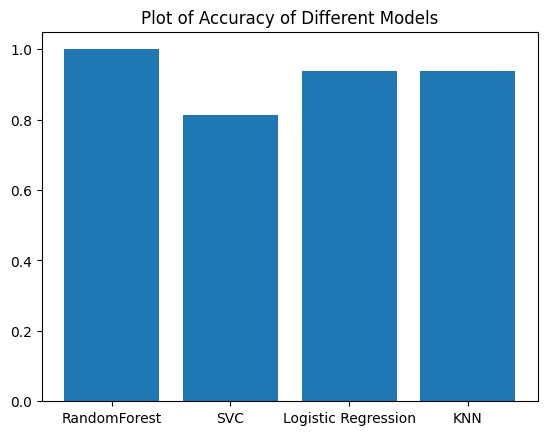

In [45]:
#plot the results
import matplotlib.pyplot as plt
plt.bar(scores.keys(),list(scores.values())) #scores.keys() returns the names of the models and scores.values() returns the accuracy scores
plt.title("Plot of Accuracy of Different Models")
plt.show()

### Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
#perform a grid search over the parameter of the different models.
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 150, 200], 
        "max_depth": [None, 2, 5, 6, 10], 
        "min_samples_split": [2, 3, 5] 
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    },
    "Logistic Regression" :{ 
        "C": [0.1, 1, 10], # 0.1 is used to prevent overfitting and 10 is used to prevent underfitting while 1 is the default value
        },
    "KNN" : {"n_neighbors":[2,5,7]} # 2 is used to prevent overfitting and 7 is used to prevent underfitting while 5 is the default value

best_models = {}
best_scores = {}

for name,model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv = 5)
    #fit the model
    grid_search.fit(X_train_scaled, y_train)

    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

    #print best parameters and score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}\n")

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best score for RandomForest: 1.0

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVC: 0.9800000000000001

Best parameters for Logistic Regression: {'C': 10}
Best score for Logistic Regression: 0.96

Best parameters for KNN: {'n_neighbors': 5}
Best score for KNN: 0.6799999999999999



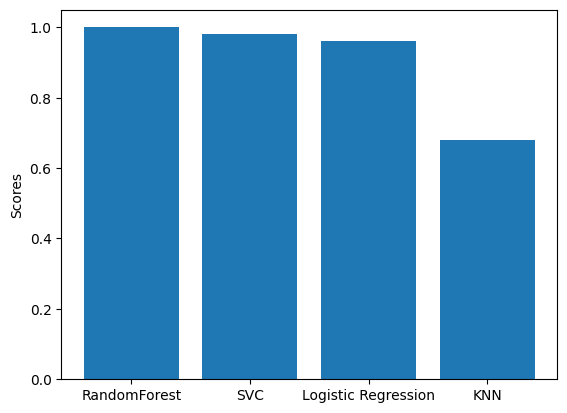

In [47]:
#plot the results
plt.bar(best_scores.keys(),list(best_scores.values()))
plt.ylabel("Scores")
plt.show()

## Model Evaluation


In [48]:
from sklearn.metrics import classification_report
#evaluate the best model 
for name , model in best_models.items():
    print(f"Report for {name}:")
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test,y_pred)
    print(report, "\n")


Report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16
 

Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16
 

Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        

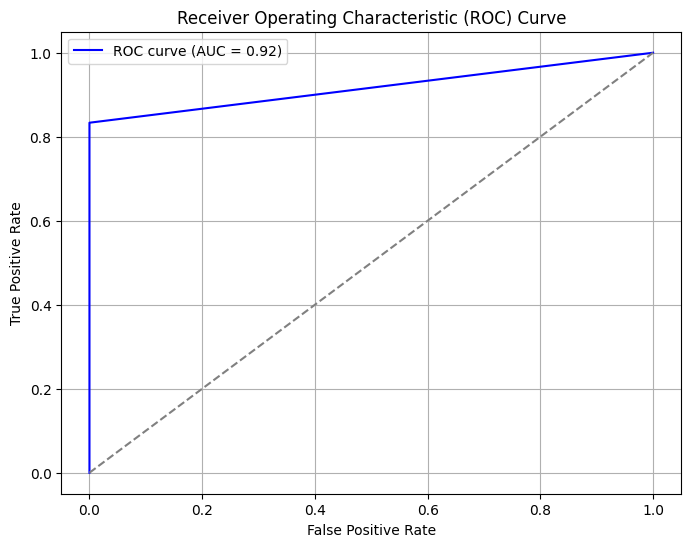

AUC: 0.92


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#auc score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

### Save the best model

In [50]:
import joblib
model = best_models.get("RandomForest")
joblib.dump(model, "model.pkl")

['model.pkl']